In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import datetime as dt
import missingno as mnso
import warnings
import seaborn as sns

In [2]:
df = pd.read_csv("./data/netflix_titles.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print("{} null rate: {}".format(i, round(null_rate, 2)))

director null rate: 29.91
cast null rate: 9.37
country null rate: 9.44
date_added null rate: 0.11
rating null rate: 0.05
duration null rate: 0.03


In [4]:
df["country"] = df["country"].fillna(df["country"].mode()[0])

df["cast"].replace(np.nan, "No Data", inplace=True)
df["director"].replace(np.nan, "No Data", inplace=True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [8]:
df["date_added"] = pd.to_datetime(df["date_added"])

df["month_added"] = df["date_added"].dt.month
df["month_name_added"] = df["date_added"].dt.month_name()
df["year_added"] = df["date_added"].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


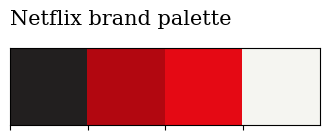

In [9]:
sns.palplot(["#221f1f", "#b20710", "#e50914", "#f5f5f1"])

plt.title("Netflix brand palette", loc="left", fontfamily="serif", fontsize=15, y=1.2)
plt.show()

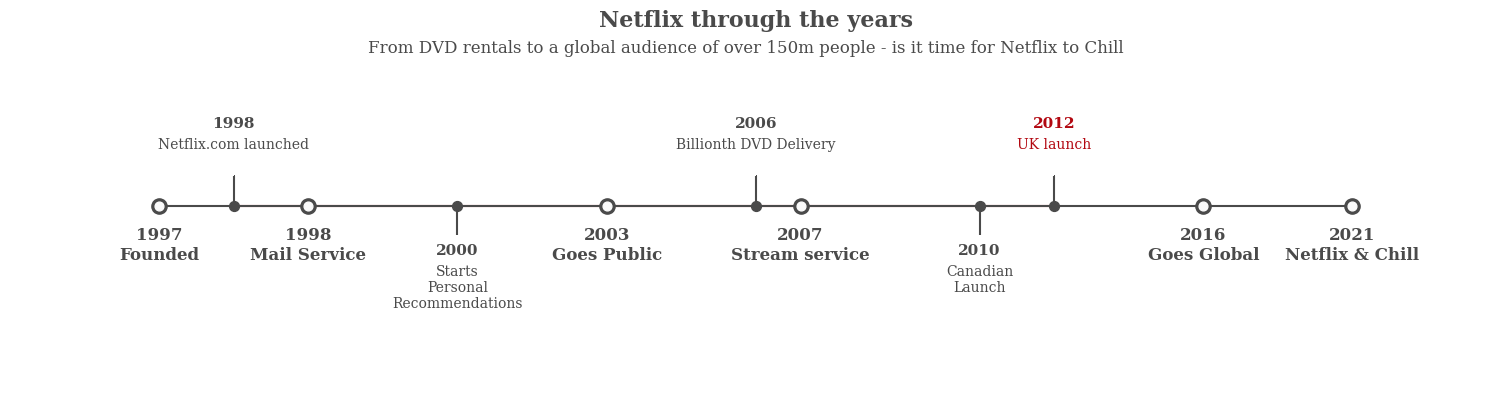

In [10]:
from datetime import datetime

tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStream service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill",
]

tl_x = [1, 2, 4, 5.3, 8, 9]

#############

tl_sub_x = [1.5, 3, 5, 6.5, 7]

tl_sub_times = ["1998", "2000", "2006", "2010", "2012"]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations",
    "Billionth DVD Delivery",
    "Canadian\nLaunch",
    "UK launch",
]

###############

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# Timeline: Line
ax.axhline(0, xmin=0.1, xmax=0.9, c="#4a4a4a", zorder=1)

# Tineline: Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c="#4a4a4a", zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=40, c="#fafafa", zorder=3)

# Timeline: Time points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c="#4a4a4a", zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(
        x,
        -0.55,
        date,
        ha="center",
        fontfamily="serif",
        fontweight="bold",
        color="#4a4a4a",
        fontsize=12,
    )

# Stemplot: vertical line
levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3

markerline, stemline, baseline = ax.stem(tl_sub_x, levels)
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=",", color="#4a4a4a")
plt.setp(stemline, color="#4a4a4a")

# Text
for idx, x, time, txt in zip(
    range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text
):
    ax.text(
        x,
        1.3 * (idx % 2) - 0.5,
        time,
        ha="center",
        fontfamily="serif",
        fontweight="bold",
        color="#4a4a4a" if idx != len(tl_sub_x) else "#b20710",
        fontsize=11,
    )

    ax.text(
        x,
        1.3 * (idx % 2) - 0.6,
        txt,
        ha="center",
        va="top",
        fontfamily="serif",
        color="#4a4a4a" if idx != len(tl_sub_x) else "#b20710",
    )

for spine in ["left", "top", "bottom", "right"]:
    ax.spines[spine].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])


ax.set_title(
    "Netflix through the years",
    fontweight="bold",
    fontfamily="serif",
    fontsize="16",
    color="#4a4a4a",
)
ax.text(
    2.4,
    1.57,
    "From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill",
    fontfamily="serif",
    fontsize=12,
    color="#4a4a4a",
)


plt.show()

In [11]:
x = df.groupby(["type"])["type"].count()
y = len(df)
r = (x / y).round(2)
print(x, y, r)
mf_ratio = pd.DataFrame(r).T
mf_ratio

type
Movie      6126
TV Show    2664
Name: type, dtype: int64 8790 type
Movie      0.7
TV Show    0.3
Name: type, dtype: float64


type,Movie,TV Show
type,0.7,0.3


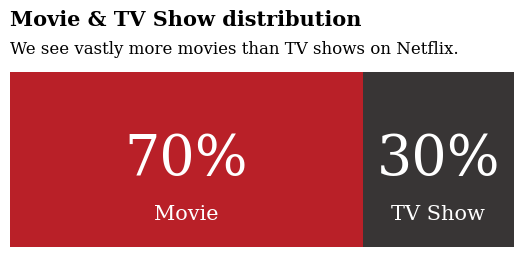

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))
ax.barh(mf_ratio.index, mf_ratio["Movie"], color="#b20710", alpha=0.9, label="Male")
ax.barh(
    mf_ratio.index,
    mf_ratio["TV Show"],
    left=mf_ratio["Movie"],
    color="#221f1f",
    alpha=0.9,
    label="Female",
)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(
        f"{int(mf_ratio['Movie'][i]*100)}%",
        xy=(mf_ratio["Movie"][i] / 2, i),
        va="center",
        ha="center",
        fontsize=40,
        fontweight="light",
        fontfamily="serif",
        color="white",
    )
    ax.annotate(
        "Movie",
        xy=(mf_ratio["Movie"][i] / 2, -0.25),
        va="center",
        ha="center",
        fontsize=15,
        fontweight="light",
        fontfamily="serif",
        color="white",
    )

for i in mf_ratio.index:
    ax.annotate(
        f"{int(mf_ratio['TV Show'][i]*100)}%",
        xy=(mf_ratio["Movie"][i] + mf_ratio["TV Show"][i] / 2, i),
        va="center",
        ha="center",
        fontsize=40,
        fontweight="light",
        fontfamily="serif",
        color="white",
    )
    ax.annotate(
        "TV Show",
        xy=(mf_ratio["Movie"][i] + mf_ratio["TV Show"][i] / 2, -0.25),
        va="center",
        ha="center",
        fontfamily="serif",
        fontsize=15,
        fontweight="light",
        c="white",
    )

for spine in ["left", "right", "bottom", "top"]:
    ax.spines[spine].set_visible(False)

fig.text(
    0.125,
    1.03,
    "Movie & TV Show distribution",
    fontfamily="serif",
    fontsize=15,
    fontweight="bold",
)
fig.text(
    0.125,
    0.92,
    "We see vastly more movies than TV shows on Netflix.",
    fontfamily="serif",
    fontsize=12,
)

plt.show()

In [13]:
# Quick feature engineering

# Helper column for various plots

df["count"] = 1

df["first_country"] = df["country"].apply(lambda x: x.split(",")[0])
df["first_country"].head()

ratings_ages = {
    "TV-PG": "Older Kids",
    "TV-MA": "Adults",
    "TV-Y7-FV": "Older Kids",
    "TV-Y7": "Older Kids",
    "TV-14": "Teens",
    "R": "Adults",
    "TV-Y": "Kids",
    "NR": "Adults",
    "PG-13": "Teens",
    "TV-G": "Kids",
    "PG": "Older Kids",
    "G": "Kids",
    "UR": "Adults",
    "NC-17": "Adults",
}

df["target_ages"] = df["rating"].replace(ratings_ages)
df["target_ages"].unique()

df["gender"] = df["listed_in"].apply(
    lambda x: x.replace(" ,", ",").replace(", ", ",").split(",")
)
df["first_country"].replace("United States", "USA", inplace=True)
df["first_country"].replace("United Kingdom", "UK", inplace=True)
df["first_country"].replace("South Korea", "S. Korea", inplace=True)
data = df.groupby("first_country")["count"].sum().sort_values(ascending=False)[:10]
print(data)

first_country
USA          4031
India        1008
UK            627
Canada        271
Japan         257
France        212
S. Korea      211
Spain         181
Mexico        134
Australia     115
Name: count, dtype: int64


/tmp/ipykernel_4831/1100894341.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, fontfamily="serif", rotation=0)


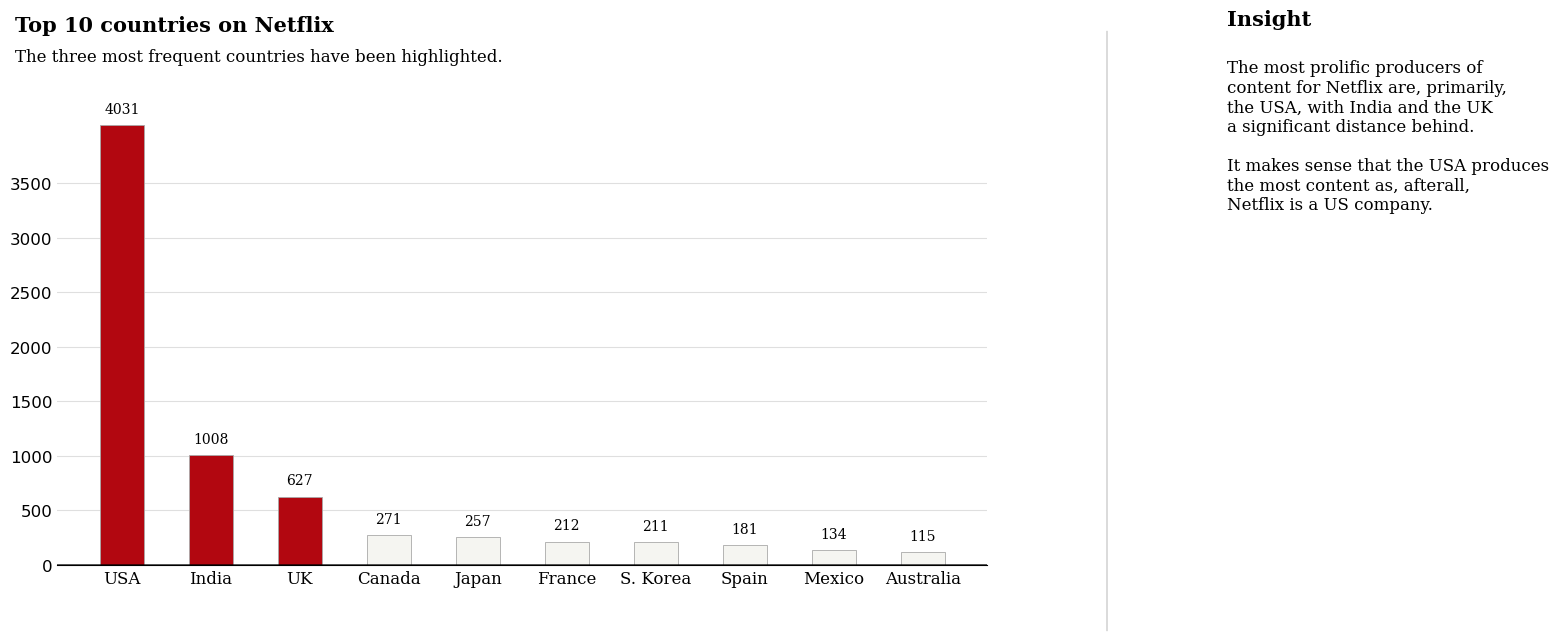

In [14]:
# Plot
color_map = ["#f5f5f1" for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = "#b20710"

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(
    data.index, data, width=0.5, edgecolor="darkgray", linewidth=0.6, color=color_map
)

# annotate
for i in data.index:
    ax.annotate(
        f"{data[i]}",
        xy=[i, data[i] + 150],
        va="center",
        ha="center",
        fontweight="light",
        fontfamily="serif",
    )

# Tick label
ax.set_xticklabels(data.index, fontfamily="serif", rotation=0)

ax.grid(axis="y", linestyle="-", alpha=0.4)
grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y=0, color="black", linewidth=1.3, alpha=0.7)
ax.tick_params(axis="both", which="major", labelsize=12)

for spine in ["top", "left", "right"]:
    ax.spines[spine].set_visible(False)

import matplotlib.lines as lines

l1 = lines.Line2D(
    [1, 1], [0, 1], transform=fig.transFigure, figure=fig, color="black", lw=0.2
)
fig.lines.extend([l1])

ax.tick_params(axis="both", which="both", length=0)

fig.text(
    0.09,
    1,
    "Top 10 countries on Netflix",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.09,
    0.95,
    "The three most frequent countries have been highlighted.",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

fig.text(1.1, 1.01, "Insight", fontsize=15, fontweight="bold", fontfamily="serif")

fig.text(
    1.1,
    0.67,
    """
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.
""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

plt.show()

In [15]:
country_order = df["first_country"].value_counts()[:11].index
data_q2q3 = (
    df[["type", "first_country"]]
    .groupby("first_country")["type"]
    .value_counts()
    .unstack()
    .loc[country_order]
)
data_q2q3["sum"] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (
    (data_q2q3.T / data_q2q3["sum"])
    .T[["Movie", "TV Show"]]
    .sort_values(by="Movie", ascending=False)[::-1]
)
print(data_q2q3.head())
print("=============================")
print(data_q2q3_ratio.head())

type     Movie  TV Show     sum
USA     2800.0   1231.0  4031.0
India    927.0     81.0  1008.0
UK       382.0    245.0   627.0
Canada   187.0     84.0   271.0
Japan     85.0    172.0   257.0
type          Movie   TV Show
S. Korea   0.222749  0.777251
Japan      0.330739  0.669261
Australia  0.530435  0.469565
UK         0.609250  0.390750
Mexico     0.641791  0.358209


/tmp/ipykernel_4831/1734499452.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_q2q3_ratio.index, fontfamily="serif", fontsize=11)


[]

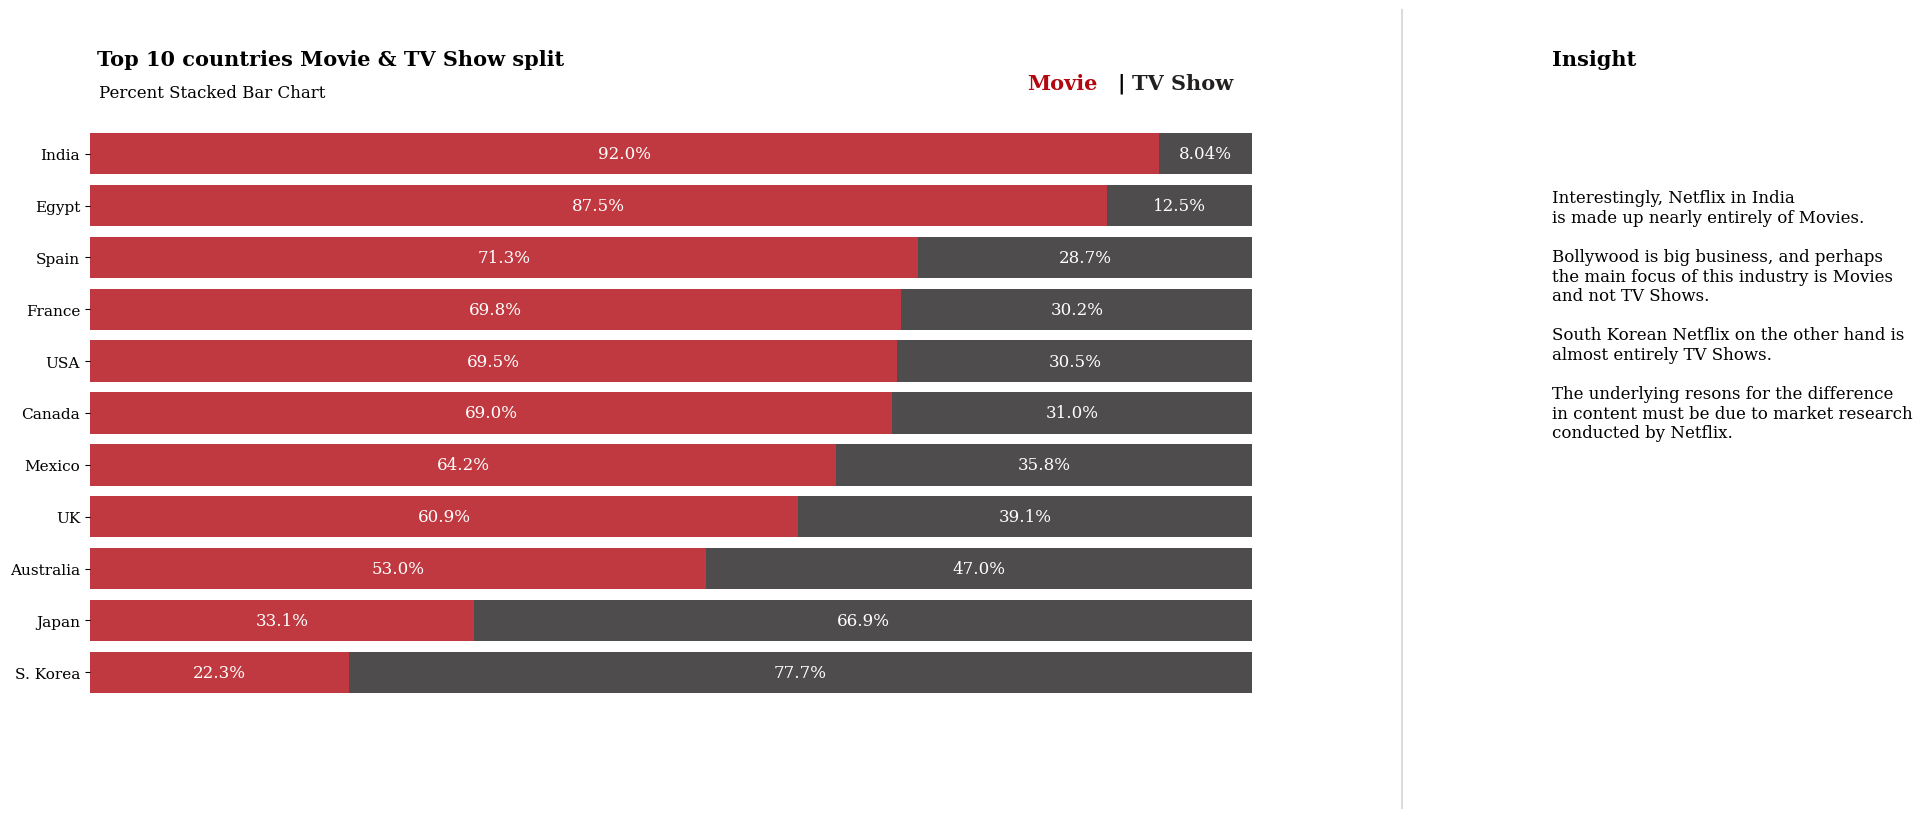

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.barh(
    data_q2q3_ratio.index,
    data_q2q3_ratio["Movie"],
    color="#b20710",
    alpha=0.8,
    label="Movie",
)
ax.barh(
    data_q2q3_ratio.index,
    data_q2q3_ratio["TV Show"],
    left=data_q2q3_ratio["Movie"],
    color="#221f1f",
    alpha=0.8,
    label="TV Show",
)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily="serif", fontsize=11)

for i in data_q2q3_ratio.index:
    ax.annotate(
        f"{data_q2q3_ratio['Movie'][i]*100:.3}%",
        xy=(data_q2q3_ratio["Movie"][i] / 2, i),
        va="center",
        ha="center",
        fontsize=12,
        fontfamily="serif",
        fontweight="light",
        c="white",
    )

for i in data_q2q3_ratio.index:
    ax.annotate(
        f"{data_q2q3_ratio['TV Show'][i]*100:.3}%",
        xy=(data_q2q3_ratio["Movie"][i] + data_q2q3_ratio["TV Show"][i] / 2, i),
        va="center",
        ha="center",
        fontsize=12,
        fontweight="light",
        fontfamily="serif",
        c="white",
    )


fig.text(
    0.13,
    0.93,
    "Top 10 countries Movie & TV Show split",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(0.131, 0.89, "Percent Stacked Bar Chart", fontsize=12, fontfamily="serif")

fig.text(
    0.75, 0.9, "Movie", fontweight="bold", fontfamily="serif", fontsize=15, c="#b20710"
)
fig.text(0.81, 0.9, "|", fontweight="bold", fontfamily="serif", fontsize=15, c="black")
fig.text(
    0.82,
    0.9,
    "TV Show",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    c="#221f1f",
)

fig.text(1.1, 0.93, "Insight", fontsize=15, fontweight="bold", fontfamily="serif")
fig.text(
    1.1,
    0.44,
    """
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

l1 = lines.Line2D(
    [1, 1], [0, 1], transform=fig.transFigure, figure=fig, color="black", lw=0.2
)
fig.lines.extend([l1])

for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

plt.plot()

In [17]:
order = pd.DataFrame(
    df.groupby("rating")["count"].sum().sort_values(ascending=False)
).reset_index()
rating_order = list(order["rating"])

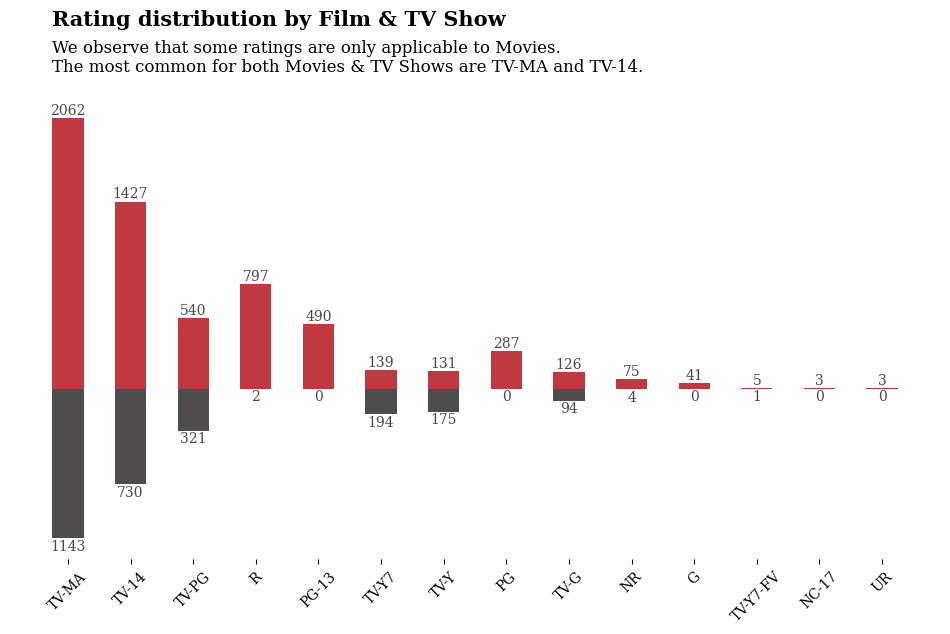

In [18]:
mf = (
    df.groupby("type")["rating"]
    .value_counts()
    .unstack()
    .sort_index()
    .fillna(0)
    .astype(int)[rating_order]
)
movie = mf.loc["Movie"]
tv = -mf.loc["TV Show"]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color="#b20710", alpha=0.8, label="Movie")
ax.bar(tv.index, tv, width=0.5, color="#221f1f", alpha=0.8, label="TV Show")

# Annotations
for i in tv.index:
    ax.annotate(
        f"{-tv[i]}",
        xy=(i, tv[i] - 60),
        va="center",
        ha="center",
        fontweight="light",
        fontfamily="serif",
        color="#4a4a4a",
    )

for i in movie.index:
    ax.annotate(
        f"{movie[i]}",
        xy=(i, movie[i] + 60),
        va="center",
        ha="center",
        fontweight="light",
        fontfamily="serif",
        color="#4a4a4a",
    )

for spine in ["left", "right", "top", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_xticks(range(len(mf.columns)))
ax.set_xticklabels(mf.columns, fontfamily="serif", rotation=45)
ax.set_yticks([])
ax.legend().set_visible(False)

fig.text(
    0.16,
    1,
    "Rating distribution by Film & TV Show",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.16,
    0.89,
    """We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

plt.show()

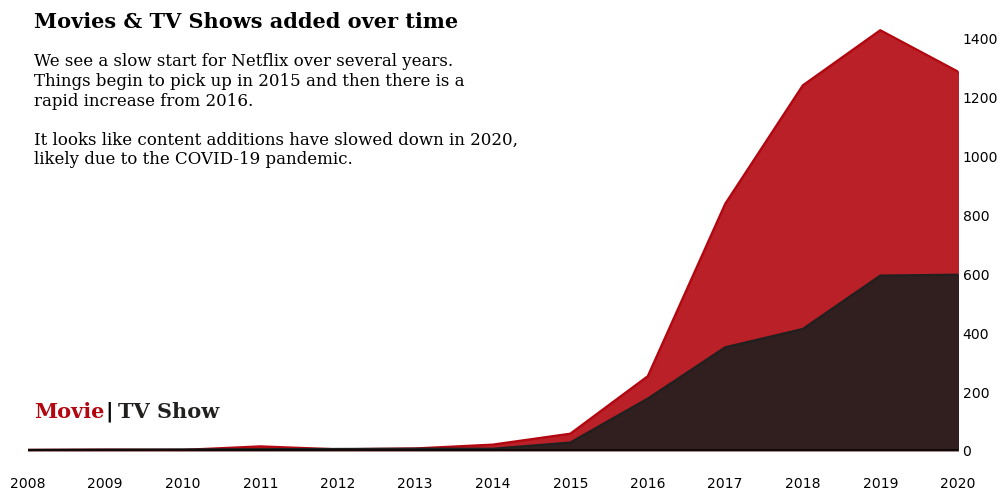

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df["type"].value_counts().sort_index().index):
    mtv_rel = df[df["type"] == mtv]["year_added"].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()
ax.tick_params(axis="both", which="both", length=0)
ax.axhline(y=0, color="black", linewidth=1.3, alpha=0.7)
ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(
    0.13,
    0.85,
    "Movies & TV Shows added over time",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.13,
    0.59,
    """We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

fig.text(
    0.13,
    0.2,
    "Movie",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#b20710",
)
fig.text(
    0.19,
    0.2,
    "|",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="black",
)
fig.text(
    0.2,
    0.2,
    "TV Show",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#221f1f",
)

for spine in ["top", "bottom", "left", "right"]:
    ax.spines[spine].set_visible(False)

plt.show()

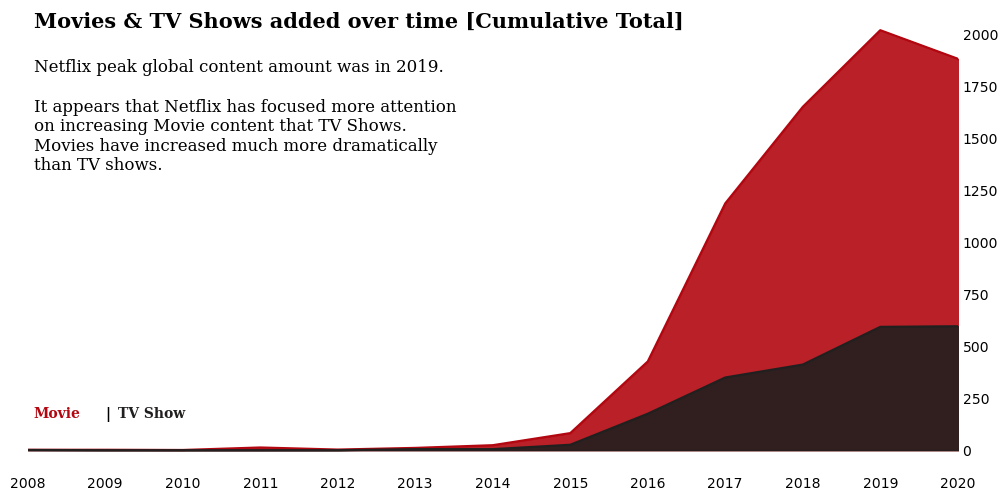

In [20]:
data_sub = (
    df.groupby("type")["year_added"]
    .value_counts()
    .unstack()
    .fillna(0)
    .loc[["TV Show", "Movie"]]
    .cumsum(axis=0)
    .T
)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df["type"].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv, alpha=0.9)

ax.yaxis.tick_right()
ax.tick_params(axis="both", which="both", length=0)
ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(
    0.13,
    0.85,
    "Movies & TV Shows added over time [Cumulative Total]",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.13,
    0.58,
    """Netflix peak global content amount was in 2019.

It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.
""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

fig.text(
    x=0.13, y=0.2, s="Movie", fontfamily="serif", fontweight="bold", color="#b20710"
)
fig.text(x=0.19, y=0.2, s="|", fontfamily="serif", fontweight="bold", color="black")
fig.text(
    x=0.20, y=0.2, s="TV Show", fontfamily="serif", fontweight="bold", color="#221f1f"
)

for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

plt.show()

In [21]:
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

df["month_name_added"] = pd.Categorical(
    df["month_name_added"], categories=month_order, ordered=True
)

data_sub = (
    df.groupby("type")["month_name_added"]
    .value_counts()
    .unstack()
    .fillna(0)
    .loc[["TV Show", "Movie"]]
    .cumsum(axis=0)
    .T
)
data_sub

type,TV Show,Movie
month_name_added,,
January,192,737
February,180,562
March,213,741
April,214,763
May,193,632
June,236,728
July,262,827
August,236,754
September,251,769


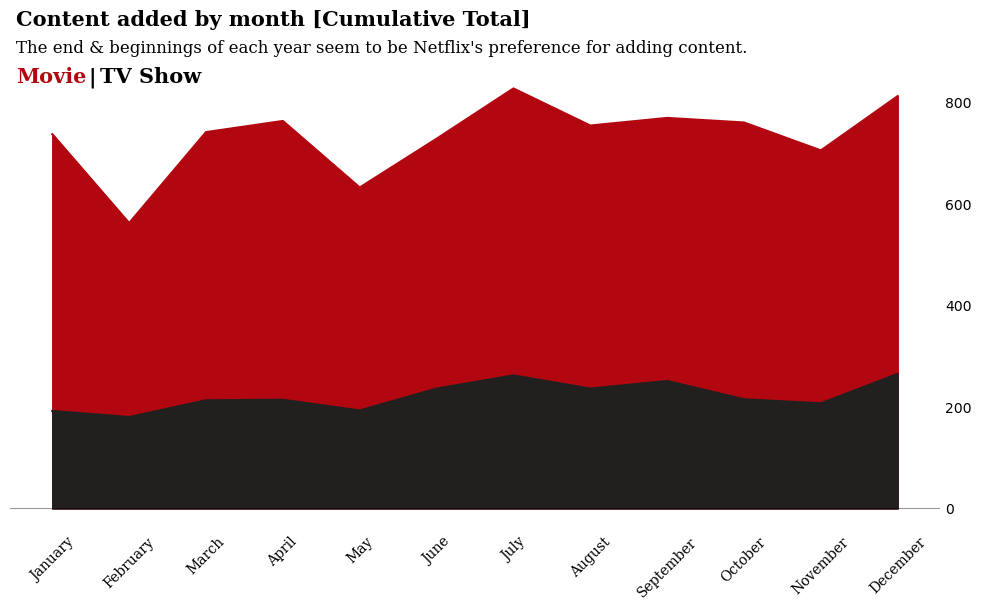

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df["type"].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, mtv_rel, color=color[i], label=mtv)

ax.yaxis.tick_right()
ax.tick_params(axis="both", which="both", length=0)
ax.axhline(y=0, color="black", linewidth=0.8, alpha=0.4)
ax.grid(False)
ax.set_xticks(range(len(data_sub.index)))
ax.set_xticklabels(data_sub.index, fontfamily="serif", rotation=45)

fig.text(
    0.13,
    0.95,
    "Content added by month [Cumulative Total]",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.13,
    0.905,
    "The end & beginnings of each year seem to be Netflix's preference for adding content.",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

fig.text(
    x=0.13,
    y=0.855,
    s="Movie",
    fontfamily="serif",
    fontweight="bold",
    fontsize=15,
    color="#b20710",
)

fig.text(
    x=0.19,
    y=0.855,
    s="|",
    fontfamily="serif",
    fontweight="bold",
    fontsize=15,
    color="black",
)
fig.text(
    x=0.2,
    y=0.855,
    s="TV Show",
    fontfamily="serif",
    fontweight="bold",
    fontsize=15,
    color="black",
)


for spine in ["top", "bottom", "left", "right"]:
    ax.spines[spine].set_visible(False)

plt.show()

In [23]:
data_sub2 = data_sub
data_sub2["Value"] = data_sub2["Movie"] + data_sub2["TV Show"]
data_sub2 = data_sub2.reset_index()
df_polar = data_sub2.sort_values(by="month_name_added", ascending=False)
print(data_sub2)
print("----------------------------------")
print(df_polar)

type month_name_added  TV Show  Movie  Value
0             January      192    737    929
1            February      180    562    742
2               March      213    741    954
3               April      214    763    977
4                 May      193    632    825
5                June      236    728    964
6                July      262    827   1089
7              August      236    754    990
8           September      251    769   1020
9             October      215    760    975
10           November      207    705    912
11           December      265    812   1077
----------------------------------
type month_name_added  TV Show  Movie  Value
11           December      265    812   1077
10           November      207    705    912
9             October      215    760    975
8           September      251    769   1020
7              August      236    754    990
6                July      262    827   1089
5                June      236    728    964
4                 Ma

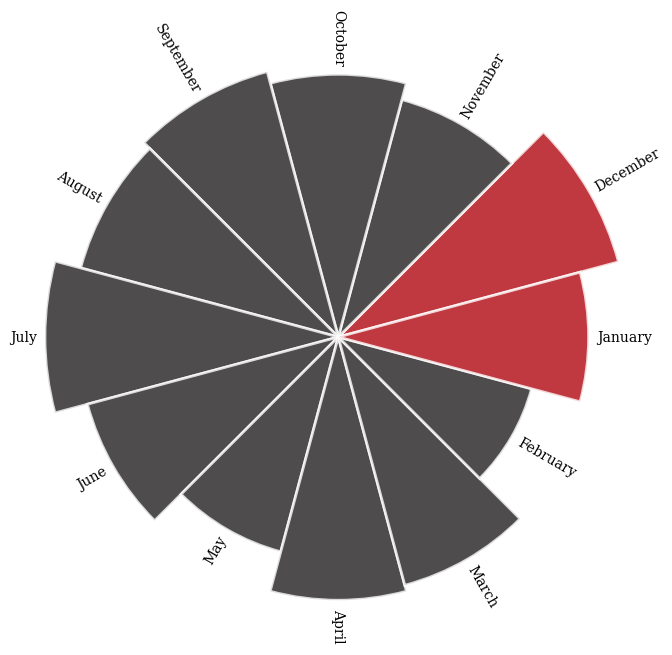

In [24]:
color_map = ["#221f1f" for _ in range(12)]
color_map[0] = color_map[11] = "#b20710"

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.axis("off")

upper_limit = 30
lower_limit = 1
label_padding = 30

max = df_polar["Value"].max()

slope = (max - lower_limit) / max
heights = slope * df_polar.Value + lower_limit

width = 2 * np.pi / len(df_polar.index)

indexes = list(range(1, len(df_polar.index) + 1))
angles = [element * width for element in indexes]
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lower_limit,
    linewidth=2,
    edgecolor="white",
    color=color_map,
    alpha=0.8,
)

for bar, angle, heigth, label in zip(
    bars, angles, heights, df_polar["month_name_added"]
):
    rotation = np.rad2deg(angle)
    aligment = ""
    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        aligment = "right"
        rotation += 180
    else:
        aligment = "left"

    ax.text(
        x=angle,
        y=lower_limit + bar.get_height() + label_padding,
        s=label,
        ha=aligment,
        fontfamily="serif",
        fontsize=10,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
    )

plt.show()

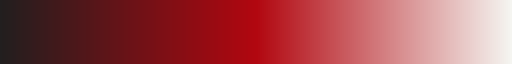

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#221f1f", "#b20710", "#f5f5f1"]
)


def genre_heatmap(df, title):
    df["genre"] = df["listed_in"].apply(
        lambda x: x.replace(" ,", ",").replace(", ", ",").split(",")
    )
    Types = []
    for i in df["genre"]:
        Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types), title))
    test = df["genre"]
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(
        0.54,
        0.88,
        "Genre correlation",
        fontfamily="serif",
        fontweight="bold",
        fontsize=15,
    )
    fig.text(
        0.75,
        0.665,
        """
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             """,
        fontfamily="serif",
        fontsize=12,
        ha="right",
    )
    pl = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=0.3,
        vmin=-0.3,
        center=0,
        square=True,
        linewidths=2.5,
    )
    plt.show()


cmap

There are 20 types in the Netflix Movie Dataset


/tmp/ipykernel_4831/2381804076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genre"] = df["listed_in"].apply(


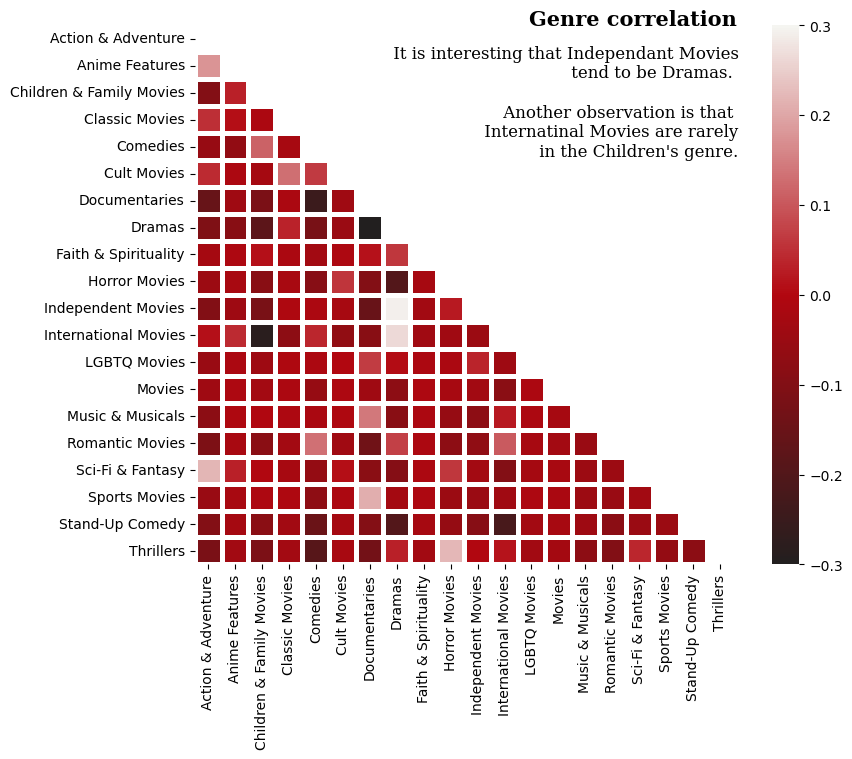

In [26]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
genre_heatmap(df_movies, "Movie")

In [27]:
data = (
    df.groupby("first_country")[["first_country", "count"]]
    .sum(numeric_only=True)
    .sort_values(by="count", ascending=False)
    .reset_index()[:10]
)
data = data["first_country"]


df_heatmap = df.loc[df["first_country"].isin(data)]
df_heatmap = pd.crosstab(
    df_heatmap["first_country"], df_heatmap["target_ages"], normalize="index"
).T

In [28]:
df_heatmap

first_country,Australia,Canada,France,India,Japan,Mexico,S. Korea,Spain,UK,USA
target_ages,,,,,,,,,,
Adults,0.460870,0.476015,0.622642,0.263889,0.354086,0.768657,0.440758,0.817680,0.523126,0.457703
Kids,0.147826,0.143911,0.084906,0.013889,0.011673,0.014925,0.042654,0.033149,0.081340,0.084346
Older Kids,0.234783,0.214022,0.103774,0.158730,0.256809,0.097015,0.118483,0.044199,0.177033,0.200695
Teens,0.156522,0.166052,0.188679,0.563492,0.377432,0.119403,0.398104,0.104972,0.218501,0.257256


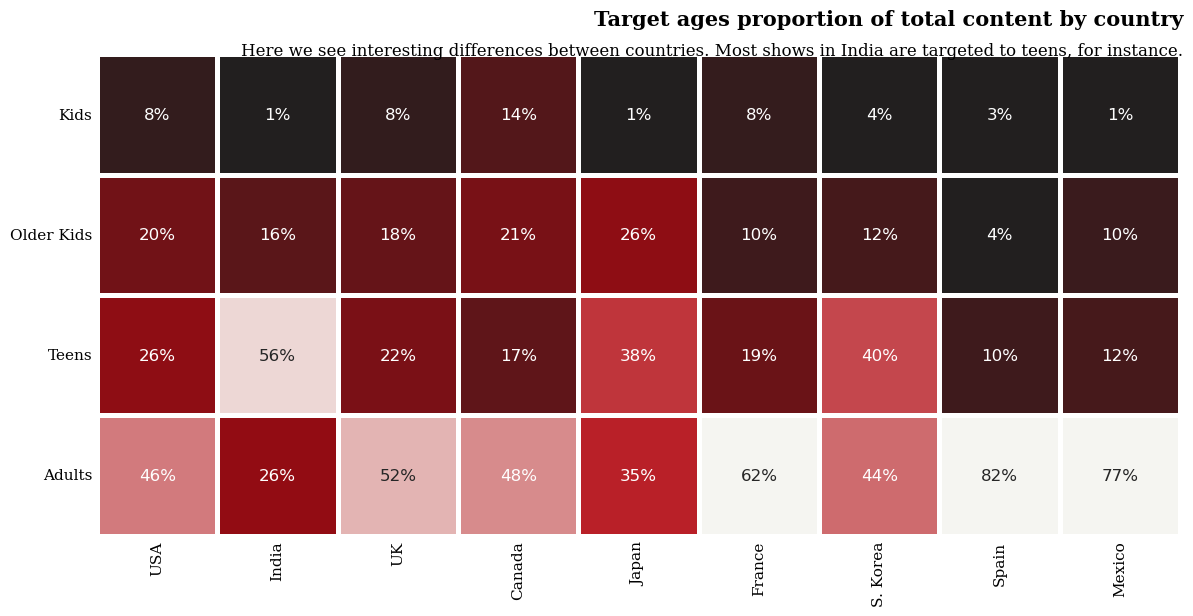

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = [
    "USA",
    "India",
    "UK",
    "Canada",
    "Japan",
    "France",
    "S. Korea",
    "Spain",
    "Mexico",
]
age_order = ["Kids", "Older Kids", "Teens", "Adults"]

sns.heatmap(
    df_heatmap.loc[age_order, country_order2],
    cmap=cmap,
    square=True,
    linewidth=2.5,
    cbar=False,
    annot=True,
    fmt="1.0%",
    vmax=0.6,
    vmin=0.05,
    ax=ax,
    annot_kws={"fontsize": 12},
)

ax.tick_params(axis="both", which="both", length=0)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily="serif", rotation=90, fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily="serif", rotation=0, fontsize=11)

ax.spines["top"].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")

plt.tight_layout()

fig.text(
    0.99,
    0.725,
    "Target ages proportion of total content by country",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    ha="right",
)
fig.text(
    0.99,
    0.7,
    "Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.",
    ha="right",
    fontsize=12,
    fontfamily="serif",
)

plt.show()

In [30]:
data = (
    df_movies.groupby("first_country")[["first_country", "count"]]
    .sum(numeric_only=True)
    .sort_values("count", ascending=False)
    .reset_index()[:10]["first_country"]
)
df_loli = df_movies.loc[df_movies["first_country"].isin(data)]
loli = df_loli.groupby("first_country")[["release_year", "year_added"]].mean().round()
ordered_df = loli.sort_values(by="release_year")
ordered_df_rev = loli.sort_values(by="release_year", ascending=False)

my_range = range(1, len(loli.index) + 1)

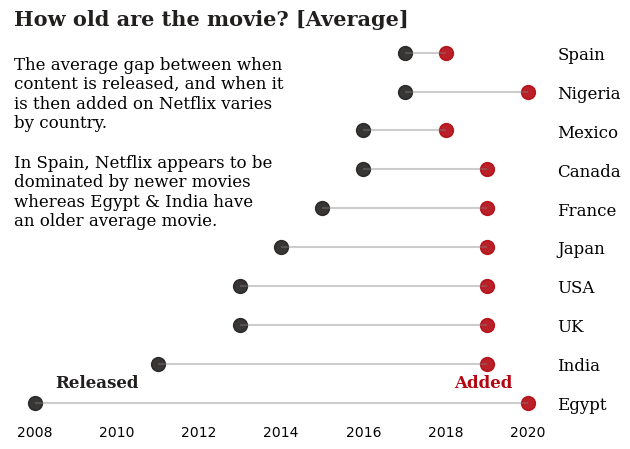

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(
    x=0.13,
    y=0.9,
    s="How old are the movie? [Average]",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
    color="#221f1f",
)

for spine in ["top", "left", "bottom", "right"]:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis="both", which="both", length=0)
ax.yaxis.tick_right()


ax.scatter(
    ordered_df["release_year"],
    my_range,
    color="#221f1f",
    s=100,
    alpha=0.9,
    label="Average release date",
)
ax.scatter(
    ordered_df["year_added"],
    my_range,
    color="#b20710",
    s=100,
    alpha=0.9,
    label="Average added date",
)
ax.hlines(
    y=my_range,
    xmin=ordered_df["release_year"],
    xmax=ordered_df["year_added"],
    colors="gray",
    alpha=0.4,
)

fig.text(
    0.19,
    0.175,
    "Released",
    fontweight="bold",
    fontfamily="serif",
    fontsize=12,
    color="#221f1f",
)
fig.text(
    0.76,
    0.175,
    "Added",
    fontweight="bold",
    fontfamily="serif",
    fontsize=12,
    color="#b20710",
)
fig.text(
    0.13,
    0.46,
    """The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

plt.yticks(my_range, ordered_df.index, fontname="serif", fontsize=12)


plt.show()

In [32]:
data = (
    df_tv.groupby("first_country")[["first_country", "count"]]
    .sum(numeric_only=True)
    .sort_values(by="count", ascending=False)
    .reset_index()[:10]["first_country"]
)
df_loli = df_tv.loc[df_tv["first_country"].isin(data)]
loli = df_loli.groupby("first_country")[["release_year", "year_added"]].mean().round()

ordered_df = loli.sort_values(by="release_year")

my_range = range(1, len(loli.index) + 1)
ordered_df

,release_year,year_added
first_country,,
Taiwan,2014.0,2018.0
Japan,2015.0,2019.0
Canada,2016.0,2019.0
UK,2016.0,2019.0
Australia,2017.0,2019.0
France,2017.0,2019.0
India,2017.0,2019.0
S. Korea,2017.0,2019.0
USA,2017.0,2019.0


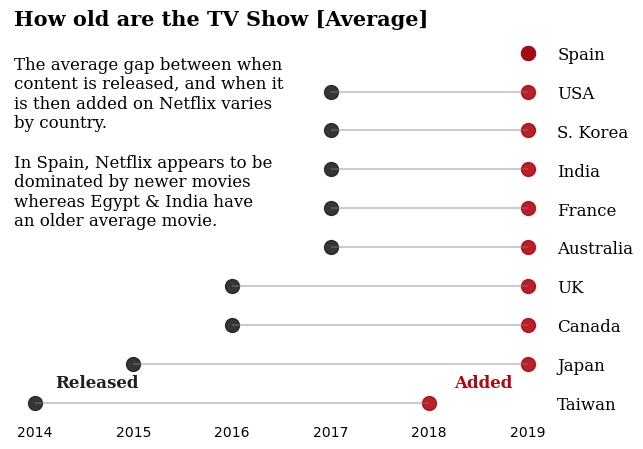

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))


ax.scatter(
    x=ordered_df["release_year"],
    y=my_range,
    color="#221f1f",
    s=100,
    alpha=0.9,
    label="Average release date",
)
ax.scatter(
    x=ordered_df["year_added"],
    y=my_range,
    color="#b20710",
    s=100,
    alpha=0.9,
    label="Average added date",
)
ax.hlines(
    y=my_range,
    xmin=ordered_df["release_year"],
    xmax=ordered_df["year_added"],
    color="grey",
    alpha=0.4,
)

for spine in ["top", "bottom", "left", "right"]:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis="both", which="both", length=0)
ax.yaxis.tick_right()


fig.text(
    x=0.13,
    y=0.9,
    s="How old are the TV Show [Average]",
    fontfamily="serif",
    fontsize=15,
    fontweight="bold",
)
fig.text(
    0.19,
    0.175,
    "Released",
    fontweight="bold",
    fontfamily="serif",
    fontsize=12,
    color="#221f1f",
)
fig.text(
    0.76,
    0.175,
    "Added",
    fontweight="bold",
    fontfamily="serif",
    fontsize=12,
    color="#b20710",
)


fig.text(
    0.13,
    0.46,
    """The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

plt.yticks(ticks=my_range, labels=ordered_df.index, fontname="serif", fontsize=12)

plt.show()

In [34]:
us_ind = df[(df["first_country"] == "USA") | (df["first_country"] == "India")]

data_sub = (
    df.groupby("first_country")["year_added"]
    .value_counts()
    .unstack()
    .fillna(0)
    .loc[["USA", "India"]]
    .cumsum(axis=0)
    .T
)

/tmp/ipykernel_4831/2419110722.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_sub.index, fontfamily="serif", rotation=0)


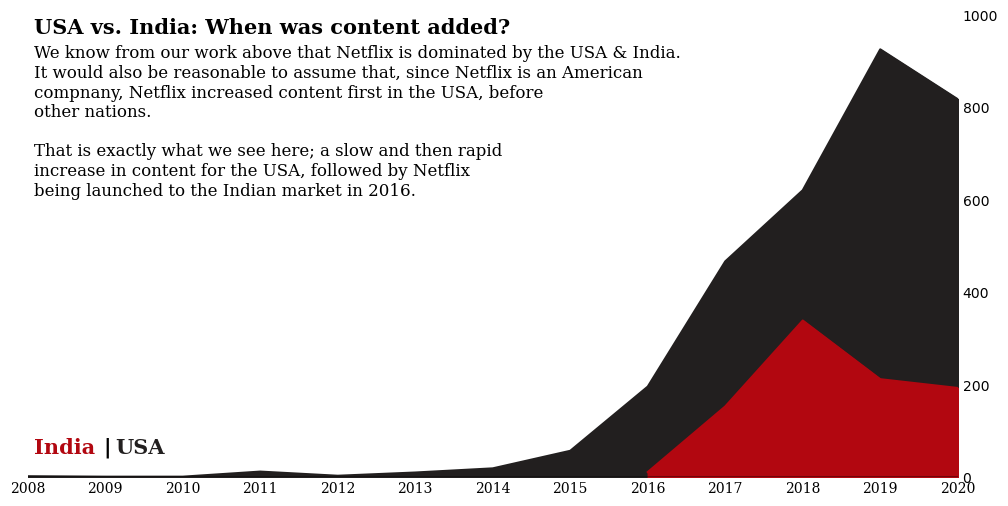

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#221f1f", "#b20710", "#f5f5f1"]

for i, hs in enumerate(us_ind["first_country"].value_counts().index):
    hs_built = (
        us_ind[us_ind["first_country"] == hs]["year_added"].value_counts().sort_index()
    )
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)
    # ax.fill_between(hs_built.index, 0, hs_built, color=color[i], alpha=0.4)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)


ax.set_ylim(0, 1000)
# ax.legend(loc='upper left')
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()

ax.axhline(y=0, color="black", linewidth=1.3, alpha=0.4)

# ax.set_ylim(0, 50)
# ax.legend(loc='upper left')
for s in ["top", "right", "bottom", "left"]:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily="serif", rotation=0)
ax.margins(x=0)  # remove white spaces next to margins

ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(
    0.13,
    0.85,
    "USA vs. India: When was content added?",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.13,
    0.58,
    """
We know from our work above that Netflix is dominated by the USA & India.
It would also be reasonable to assume that, since Netflix is an American
compnany, Netflix increased content first in the USA, before 
other nations. 

That is exactly what we see here; a slow and then rapid
increase in content for the USA, followed by Netflix 
being launched to the Indian market in 2016.""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)


fig.text(
    0.13,
    0.15,
    "India",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#b20710",
)
fig.text(
    0.188, 0.15, "|", fontweight="bold", fontfamily="serif", fontsize=15, color="black"
)
fig.text(
    0.198,
    0.15,
    "USA",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#221f1f",
)


ax.tick_params(axis="both", which="both", length=0)


plt.show()

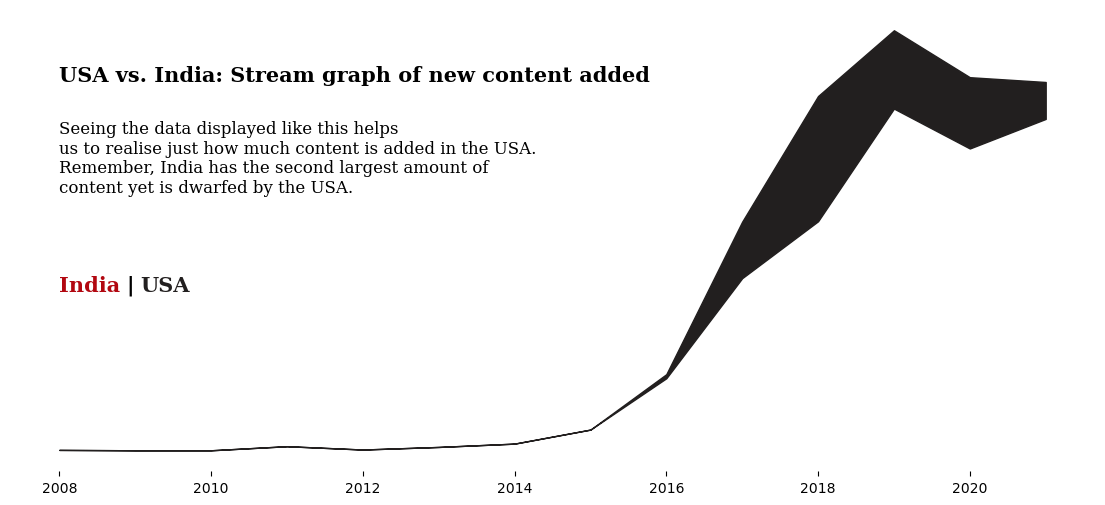

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
color = ["#b20710", "#221f1f"][::-1]
hs_list = data_sub.columns
hs_built = data_sub[hs]

for i, hs in enumerate(hs_list):
    if i == 0:
        continue
    ax.fill_between(
        hs_built.index, data_sub.iloc[:, i - 1], data_sub.iloc[:, i], color=color[i - 1]
    )

for s in ["top", "right", "bottom", "left"]:
    ax.spines[s].set_visible(False)
ax.set_axisbelow(True)
ax.set_yticks([])
# ax.legend(loc='upper left')
ax.grid(False)

fig.text(
    0.16,
    0.76,
    "USA vs. India: Stream graph of new content added",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.16,
    0.575,
    """
Seeing the data displayed like this helps 
us to realise just how much content is added in the USA.
Remember, India has the second largest amount of
content yet is dwarfed by the USA.""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

fig.text(
    0.16,
    0.41,
    "India",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#b20710",
)
fig.text(
    0.208, 0.41, "|", fontweight="bold", fontfamily="serif", fontsize=15, color="black"
)
fig.text(
    0.218,
    0.41,
    "USA",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#221f1f",
)


ax.tick_params(axis="y", which="both", length=0)

plt.show()

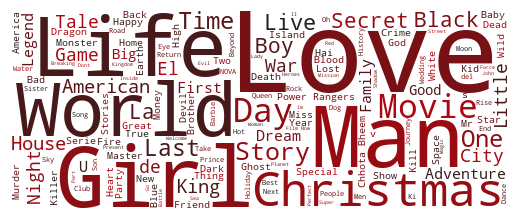

In [38]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#221f1f", "#b20710"])

text = (
    str(list(df["title"]))
    .replace(",", "")
    .replace("[", "")
    .replace("'", "")
    .replace("]", "")
    .replace(".", "")
)
wordcloud = WordCloud(
    background_color="white", width=500, height=200, colormap=cmap, max_words=150
).generate(text)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()